C:\Users\sanja\AppData\Local\Temp\ipykernel_7812\379223527.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


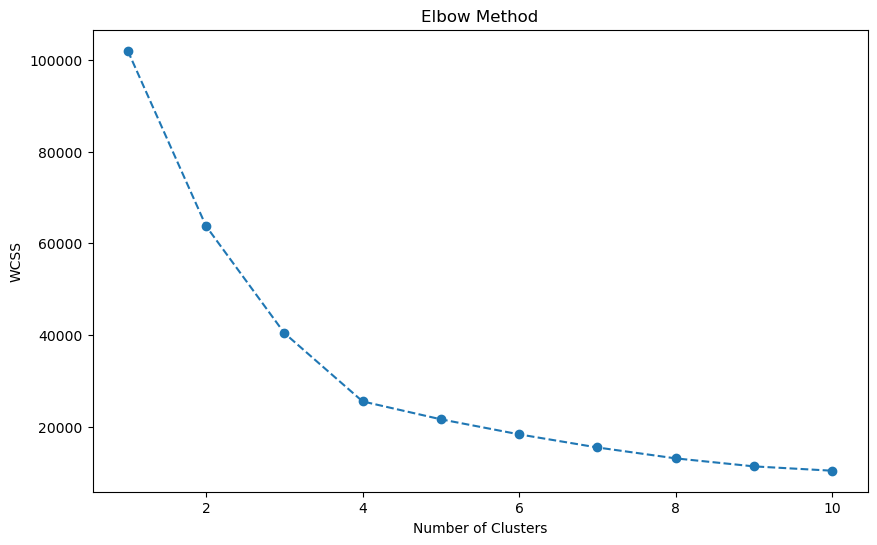

C:\Users\sanja\AppData\Local\Temp\ipykernel_7812\379223527.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'] = kmeans.fit_predict(scaled_data).copy()  # Use .copy() to create a copy


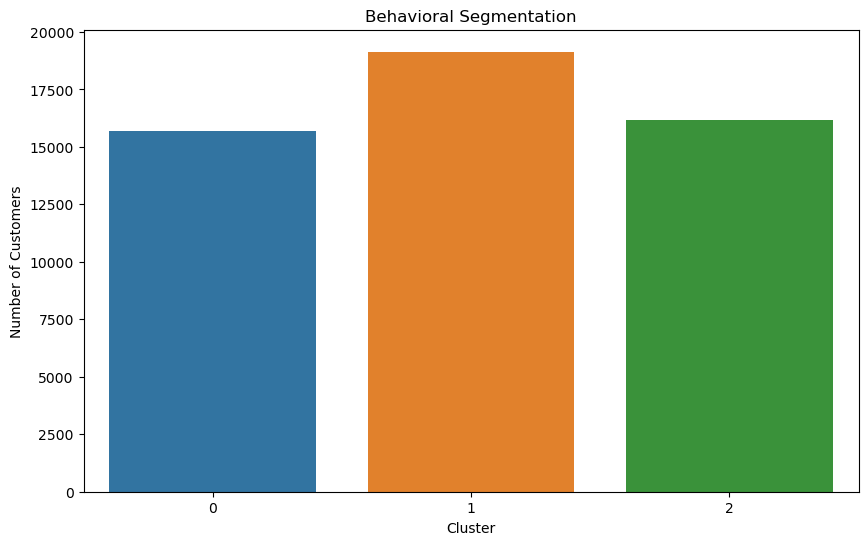

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set the number of threads to 1 to suppress warnings
os.environ['THREADPOOLCTL_THREAD_COUNT'] = '1'

# Load the dataset
dataset = pd.read_csv('Customer Segmentation.csv')

# Select the relevant columns for behavioral segmentation
selected_columns = ['email', 'phone']

# Create a subset of the data with selected columns
data = dataset[selected_columns]

# Drop rows with missing values
data.dropna(inplace=True)

# Encode categorical column 'email' and 'phone' using loc
label_encoder = LabelEncoder()
data.loc[:, 'email'] = label_encoder.fit_transform(data['email'])
data.loc[:, 'phone'] = label_encoder.fit_transform(data['phone'])

# Standardize the numeric features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)  # Explicitly set n_init
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Based on the elbow plot, choose the optimal number of clusters
optimal_clusters = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42, n_init=10)  # Explicitly set n_init
data['cluster'] = kmeans.fit_predict(scaled_data).copy()  # Use .copy() to create a copy

# Count the number of customers in each cluster
cluster_counts = data['cluster'].value_counts().sort_index()

# Plot the clusters and their counts
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values)
plt.title('Behavioral Segmentation')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()
